In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.tsv', sep='\t')
test = pd.read_csv('test_nolabel.tsv', sep='\t')

train['date_created'] = pd.to_datetime(train['date_created'])
test['date_created'] = pd.to_datetime(test['date_created'])

In [3]:
train.shape, test.shape

((351281, 20), (89251, 19))

In [31]:
train

,Unnamed: 0,category_id,city,date_created,delivery_available,desc_text,img_num,lat,long,name_text,owner_id,payment_available,price,product_id,product_type,properties,region,sold_mode,subcategory_id,sold_fast
0,1,4,Краснодар,2018-10-08,False,"Продаю стол раскладной, деревянный, советский ...",3,45.0686,38.9518,Стол,4ce583fe8231a0cc4a3c7d241c7d0289,True,500.0,8cb80c05c65c210275f5500779d6b593,1,"[{'slug_id': 'stoly_stulya_tip', 'slug_name': ...",Краснодарский край,1,410,1
1,2,4,Тюмень,2018-06-18,False,"Тарелки глубокие 6 шт. Блюдца, чашки по 6 шт. ...",2,57.1840,65.5674,Посуда,e58be2c8f143c17246dc2243b5d3b98f,False,300.0,3b7a9f8b27a53b63525f95bc8070abb2,1,"[{'slug_id': 'dom_dacha_posuda_tip', 'slug_nam...",Тюменская область,1,405,0
2,4,9,Омск,2018-07-31,True,"Новый,с этикеткой. Размер L. Не подошёл по раз...",1,54.9889,73.4312,Костюм,51b408796027214232532b7e478e2159,True,1100.0,c97dd9c5a3e938c52cf5d7822bc0eb7b,1,[{'slug_id': 'zhenskaya_odezhda_pidzhaki_kosty...,Омская область,1,908,0
3,6,3,Санкт-Петербург,2018-04-17,False,"Складывается тростью, все колеса вниз. Сплошна...",4,59.9590,30.4877,Коляска,6544b83acbbf04439a7ba983093cafb4,True,5000.0,3e5d0286b25fd7f62f88bc436a59ae4e,1,"[{'slug_id': 'waggon_type', 'slug_name': 'Тип'...",Ленинградская область,1,312,0
4,10,5,Москва,2018-02-09,False,"Неразлучники, птичкам по 1,5 года. Продаю с бо...",2,55.6473,37.4118,Волнистые попугаи,ea575e28daf1f47bfce63015cd3ce5cf,True,2000.0,57b4a8679d0d3eb1e31367b57221098f,1,[],Московская область,1,504,0
5,11,11,Гусь-Хрустальный,2018-04-28,False,"Продам детский велосипед,двухколесный,лет для ...",1,55.6063,40.6564,Велосипед детский,9ba6bb7a01bf0e577a36682da64a5dde,True,800.0,c73fd3f12f71c73ad4fa9c1b4b4f3629,1,"[{'slug_id': 'sport_tzvet', 'slug_name': 'Цвет...",Владимирская область,1,1107,0
6,12,5,Якутск,2018-02-08,False,"Отдам кота, 8 месяцев, к горшку приучен.",1,62.0355,129.6755,скоттиш страйт,7e0e13efb64cfbb1daf62a87ed63bf1f,False,1.0,be19161f29cc7e6e1795f756ef9e29e0,1,"[{'slug_id': 'koshki_poroda', 'slug_name': 'По...",Республика Саха (Якутия),1,503,0
7,13,13,Краснодар,2018-10-14,False,ТВ в рабочем состоянии,3,45.0618,38.9170,LE32R72B,e8e578f2dd291cc1b2e5944cb869028a,False,6000.0,c76ee67dfc81c0f06a3d908370a2f59e,1,"[{'slug_id': 'televizory_marka', 'slug_name': ...",Краснодарский край,1,1302,0
8,14,25,Орск,2018-06-02,False,1991 г.в.Пробег около 20000 км. Документы есть...,2,51.2585,58.6035,Минск,a992d673ee26064a0e9d157296244739,False,15000.0,c19620c06a40e40445854c4f665416da,1,"[{'slug_id': 'motocikly_skutery_tip', 'slug_na...",Оренбургская область,1,2503,0
9,15,2,Москва,2018-06-20,False,Продаю срочно бу хорошем состоянии два по 1.5 ...,3,55.8134,37.5958,Холодильники бу,fd9f4d97a20b9d279de9b45ba78d5874,True,12000.0,22670ae3efc3d73a3bec355ce05561ea,1,"[{'slug_id': 'oborudovanie_tip', 'slug_name': ...",Московская область,1,202,0


есть ли наны?

In [4]:
train.isnull().sum(), test.isnull().sum()

(Unnamed: 0            0
 category_id           0
 city                  0
 date_created          0
 delivery_available    0
 desc_text             0
 img_num               0
 lat                   0
 long                  0
 name_text             0
 owner_id              0
 payment_available     0
 price                 0
 product_id            0
 product_type          0
 properties            0
 region                0
 sold_mode             0
 subcategory_id        0
 sold_fast             0
 dtype: int64, Unnamed: 0            0
 category_id           0
 city                  0
 date_created          0
 delivery_available    0
 desc_text             0
 img_num               0
 lat                   0
 long                  0
 name_text             0
 owner_id              0
 payment_available     0
 price                 0
 product_id            0
 product_type          0
 properties            0
 region                0
 sold_mode             0
 subcategory_id        0
 dtype: int

In [10]:
train['date_created']

0        2018-10-08
1        2018-06-18
2        2018-07-31
3        2018-04-17
4        2018-02-09
5        2018-04-28
6        2018-02-08
7        2018-10-14
8        2018-06-02
9        2018-06-20
10       2018-03-29
11       2018-05-04
12       2018-01-25
13       2018-03-24
14       2018-08-02
15       2018-09-03
16       2018-05-24
17       2018-10-04
18       2018-09-11
19       2018-05-20
20       2018-07-14
21       2018-10-06
22       2018-08-14
23       2018-04-22
24       2018-10-05
25       2018-01-10
26       2018-03-31
27       2018-05-29
28       2018-04-18
29       2018-03-20
            ...    
351251   2018-03-22
351252   2018-04-06
351253   2018-10-02
351254   2018-03-25
351255   2018-10-03
351256   2018-03-03
351257   2018-08-14
351258   2018-10-03
351259   2018-10-09
351260   2018-01-04
351261   2018-10-07
351262   2018-02-17
351263   2018-02-01
351264   2018-01-12
351265   2018-04-14
351266   2018-09-05
351267   2018-08-26
351268   2018-04-04
351269   2018-04-15


**category_id  - категория товара**

какие есть категории?

In [6]:
np.unique(np.union1d(train['category_id'], test['category_id']))

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  20,  21,  22,  23,  24,  25, 100])

нарисуем распределения

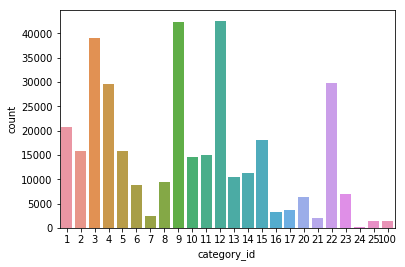

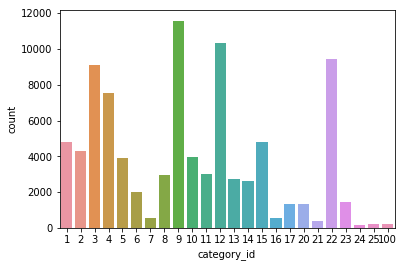

In [7]:
sns.countplot(x=train['category_id'])
plt.show()
sns.countplot(x=test['category_id'])
plt.show()

заметим, что все id из теста есть в трейне. Т.е. эти id можно использовать как фичи при обучении. Также заметим, что распределения похожи, что хорошо.

**subcategory_id - подкатегория**

In [8]:
np.unique(np.union1d(train['subcategory_id'], test['subcategory_id'])).shape

(284,)

проверим, все ли подкатегории из теста есть в трейне

In [9]:
bad_subcategories = np.setdiff1d(test['subcategory_id'].unique(), train['subcategory_id'].unique())
bad_subcategories

array([ 817, 2401, 2427])

трёх подкатегрий из теста не было в трейне. много ли таких записей в тесте?

In [10]:
test[test['subcategory_id'].isin(bad_subcategories)].shape

(9, 19)

всего-то 9 записей.Можно использовать эту фичу. 

**date_created - таймстемп создания товара**

гистограмма распределения по времени для трейна и теста

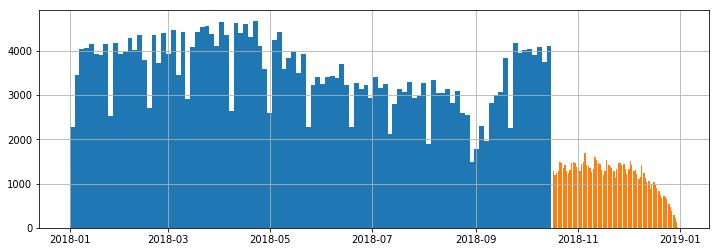

In [11]:
train['date_created'].hist(bins=100, figsize=[12,4])
test['date_created'].hist(bins=100, figsize=[12,4])

Объекты из теста расположены после объектов из трейна во времени.
- это надо учитывать при валидации. Валидироваться надо только на объектах, которые расположены после обучающей выборки. Иначе мы подсмотрим в будущее, что нелегально.

**delivery_available - возможность доставки**

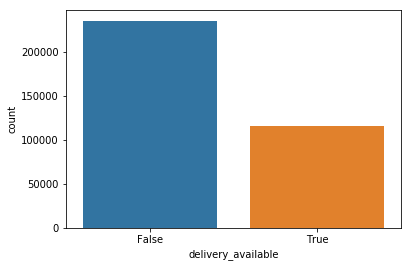

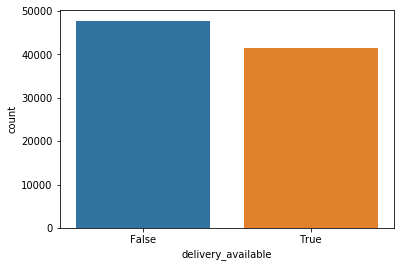

In [12]:
sns.countplot(x=train['delivery_available'])
plt.show()
sns.countplot(x=test['delivery_available'])
plt.show()

в трейне больше доля объектов для которых доставка недоступна. 

**desc_text - описание**

**name_text - название товара (услуги)**


**product_id - идентификатор продукта**

сколько айдишников продукта из теста нет в трейне?

In [13]:
np.unique(np.union1d(train['product_id'], test['product_id'])).shape

(440532,)

много!

**img_num - id количество картинок**

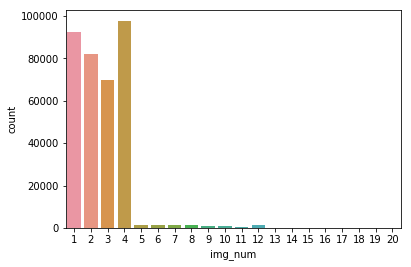

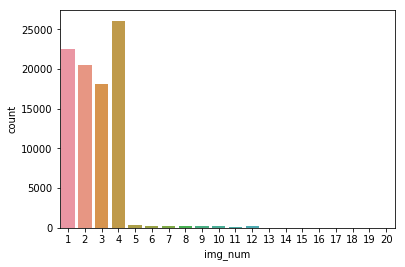

In [14]:
sns.countplot(x=train['img_num'])
plt.show()
sns.countplot(x=test['img_num'])
plt.show()

**owner_id - id заявителя**

сколько айдишников заявителя из теста нет в трейне?

In [15]:
np.unique(np.union1d(train['owner_id'], test['owner_id'])).shape

(377477,)

In [11]:
print(np.unique(np.union1d(train['owner_id'], test['owner_id'])).shape)
print(len(set(train['owner_id'])))
print(len(set(test['owner_id'])))

(377477,)
305336
83374


много!

**payment_available - возможность онлайн оплаты,**

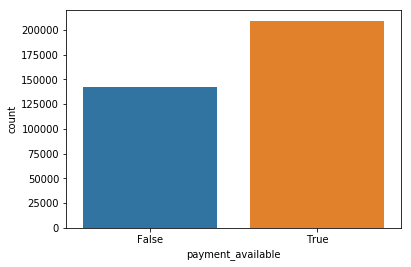

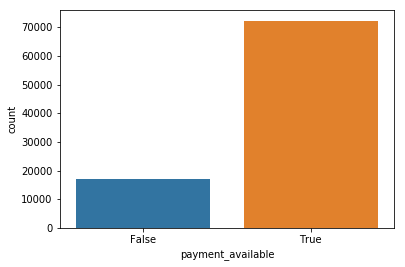

In [16]:
sns.countplot(x=train['payment_available'])
plt.show()
sns.countplot(x=test['payment_available'])
plt.show()

онлайн оплаты в тесте больше чем в трейне

**price - цена в копейках**

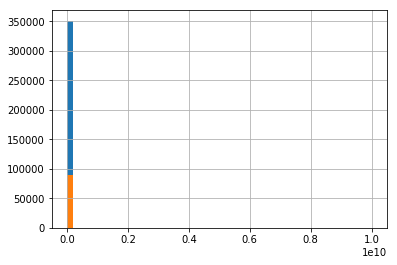

In [17]:
train['price'].hist(bins=50)
test['price'].hist(bins=50)

Выведем макс. значение и 99 квантиль

In [18]:
print('train', train['price'].max(), train['price'].quantile(q=0.999))
print('test', test['price'].max(), test['price'].quantile(q=0.999))

train 9999999999.0 2400000.0
test 9999999999.0 2061250.0000002182


похоже на $\infty$. надо будет убрать

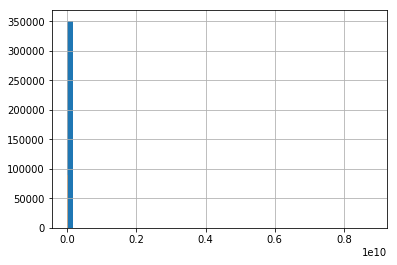

In [19]:
infty = train['price'].max()

train[train['price']<infty]['price'].hist(bins=50)
test[test['price']<infty]['price'].hist(bins=50)

In [30]:
train = train[train['price']<9999999999]

Давайте ещё и на минимальное значение посмотрим

In [28]:
len(train['price'][train['price']==9999999999.0])

0

In [13]:
len(test[test['price']==0])

2975

In [14]:
len(train[train['price']==0])

12262

Бесплатные товары, чудо. Бесплатные товары это хорошо, но они не дадут взять логарифм. Уберём их и возьмем его 

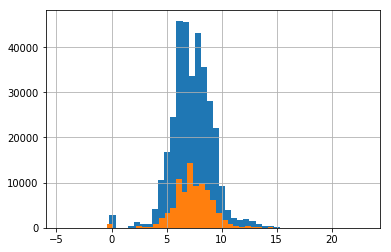

In [17]:
infty = train['price'].max()

np.log(train[0<train['price']]['price']).hist(bins=50)
np.log(test[0<test['price']]['price']).hist(bins=50)

Тут видно что гистограммы похожи, что хорошо.

**lat, long - месторасположение**

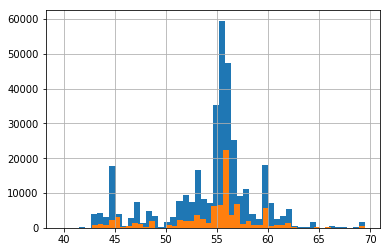

In [22]:
train['lat'].hist(bins=50)
test['lat'].hist(bins=50)

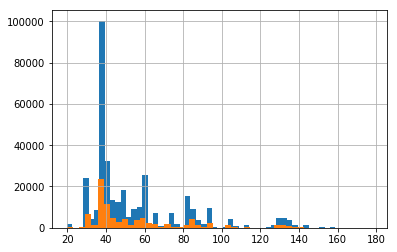

In [23]:
train['long'].hist(bins=50)
test['long'].hist(bins=50)

скорее всего юзлес фичи, т.к. город за нас определили в фиче city. Скорее всего в city вся полезная игформация из широты/долготы уже есть

**product_type - тип товара**

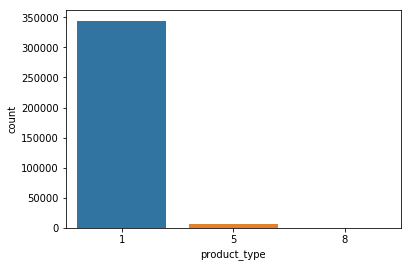

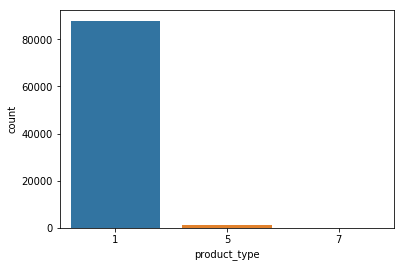

In [24]:
sns.countplot(x=train['product_type'])
plt.show()
sns.countplot(x=test['product_type'])
plt.show()

In [25]:
train['product_type'].unique(), test['product_type'].unique()

(array([1, 5, 8]), array([1, 5, 7]))

 В чём причина?

**city, region - регион**

In [26]:
train['city'].unique().shape, test['city'].unique().shape

((2299,), (1558,))

In [27]:
np.setdiff1d(test['city'].unique(), train['city'].unique()).shape

(97,)

97 городов в тесте мы не видели в трейне

In [28]:
train['region'].unique().shape, test['region'].unique().shape

((109,), (82,))

In [29]:
np.setdiff1d(test['region'].unique(), train['region'].unique())

array(['Чукотский автономный округ'], dtype=object)

In [30]:
test[test['region']=='Чукотский автономный округ']

,Unnamed: 0,category_id,city,date_created,delivery_available,desc_text,img_num,lat,long,name_text,owner_id,payment_available,price,product_id,product_type,properties,region,sold_mode,subcategory_id
70231,399042,9,Анадырь,2018-12-19,False,Теплая,1,64.7353,177.4957,Пальто,f1eb4ed0b696c3a0728d1b222e5d717f,True,4500.0,8a3d562b7884ef10d93be5d45244738e,1,"[{'slug_id': 'zhenskaya_odezhda_tzvet', 'slug_...",Чукотский автономный округ,1,903


Целая одна запись в тесте соовтествует чукотскому АО! Купили пальто

**sold_fast - целевая переменная**

наконец таргет

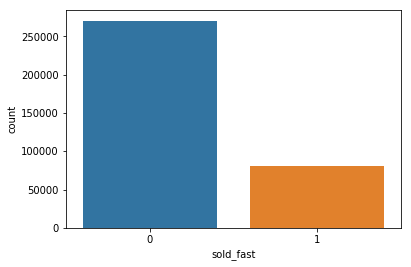

In [31]:
sns.countplot(x=train['sold_fast'])

вспоминаем в чём трейн и тест отличались и строим соотв. условные распределения

p(sold_fast | delivery_available=1) и p(sold_fast | delivery_available=0)

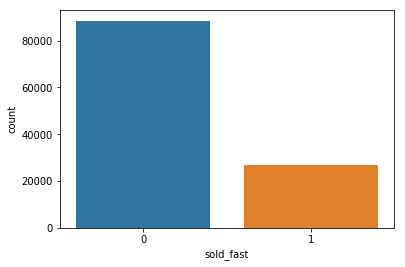

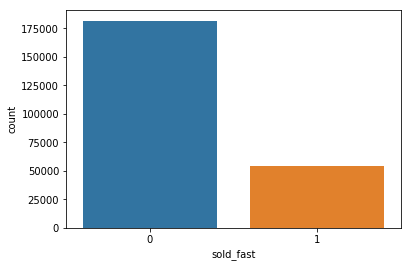

In [32]:
sns.countplot(x=train[train['delivery_available']==True]['sold_fast'])
plt.show()
sns.countplot(x=train[train['delivery_available']==False]['sold_fast'])
plt.show()

p(sold_fast | payment_available=1) и p(sold_fast | payment_available=0)

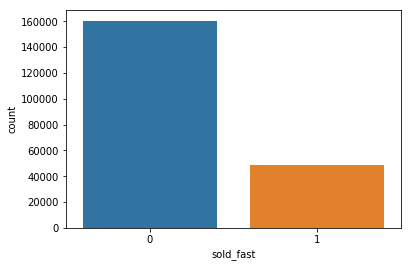

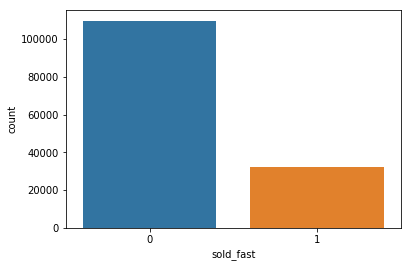

In [33]:
sns.countplot(x=train[train['payment_available']==True]['sold_fast'])
plt.show()
sns.countplot(x=train[train['payment_available']==False]['sold_fast'])
plt.show()

Мы видим, что таргет расределён одинаково для фиксированны payment_available и delivery_available. Так что в этом плане различий между трейном и тестом скорее всего не будет.

In [309]:
!pip install catboost

In [774]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [1571]:
train_data = pd.read_csv('train.tsv', sep='\t')
test = pd.read_csv('test_nolabel.tsv', sep='\t')

#train_data['date_created'] = pd.to_datetime(train_data['date_created'])
# test['date_created'] = pd.to_datetime(test['date_created'])

train_data['delivery_available'] = (train_data['delivery_available'] == True).astype(int)
train_data['payment_available'] = (train_data['payment_available'] == True).astype(int)
train_data = train_data[train_data['price']<9999999999]

test['delivery_available'] = (test['delivery_available'] == True).astype(int)
test['payment_available'] = (test['payment_available'] == True).astype(int)

In [1572]:
train_data['date_created'] = pd.to_datetime(train_data['date_created'])
test['date_created'] = pd.to_datetime(test['date_created'])

# train_data['properties'] = train_data['properties'].apply(lambda t: t.replace('\'',''))
# test['properties'] = train_data['properties'].apply(lambda t: t.replace('}',''))

In [1573]:
def my_function2(t):
    if t.lower().find("прода")==-1:
        return t
    else:
        return "прода"
    
def my_function3(t):
    if t.lower().find("состоян")==-1:
        return t
    else:
        return "состоян"
    
def my_function4(t):
    if t.lower().find("работает")==-1:
        return t
    else:
        return "работает"
    
def my_function5(t):
    if t.lower().find("отда")==-1:
        return t
    else:
        return "отда"
    
def my_function6(t):
    if t.lower().find("торг")==-1:
        return t
    else:
        return "торг"

In [1574]:
desc_text = train_data['desc_text']
a = desc_text.apply(lambda t: my_function2(t))
train_data['desc_text'] = a

desc_text = test['desc_text']
a = desc_text.apply(lambda t: my_function2(t))
test['desc_text'] = a

desc_text = train_data['desc_text']
a = desc_text.apply(lambda t: my_function3(t))
train_data['desc_text'] = a

desc_text = test['desc_text']
a = desc_text.apply(lambda t: my_function3(t))
test['desc_text'] = a

desc_text = train_data['desc_text']
a = desc_text.apply(lambda t: my_function4(t))
train_data['desc_text'] = a

desc_text = test['desc_text']
a = desc_text.apply(lambda t: my_function4(t))
test['desc_text'] = a

desc_text = train_data['desc_text']
a = desc_text.apply(lambda t: my_function5(t))
train_data['desc_text'] = a

desc_text = test['desc_text']
a = desc_text.apply(lambda t: my_function5(t))
test['desc_text'] = a

desc_text = train_data['desc_text']
a = desc_text.apply(lambda t: my_function6(t))
train_data['desc_text'] = a

desc_text = test['name_text']
a = desc_text.apply(lambda t: my_function6(t))
test['name_text'] = a

In [1575]:
train_data = train_data.drop(['Unnamed: 0','lat','long', 'owner_id', 'product_id','region'], axis=1)
test = test.drop(['Unnamed: 0','lat','long','owner_id', 'product_id','region'], axis=1)


In [1576]:
train_data['date_created'] = train_data['date_created'].apply(lambda t: t.weekday())
test['date_created'] = test['date_created'].apply(lambda t: t.weekday())


In [1577]:
from sklearn.model_selection import train_test_split 

X = train_data
y = train_data['sold_fast'].values

#test-huest
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# X_train = X
# y_train = y

In [1578]:
X_train = X_train.drop('sold_fast', axis=1)
#X_test = X_test.drop('sold_fast', axis=1)


In [1579]:
X_train.head(2)

,category_id,city,date_created,delivery_available,desc_text,img_num,name_text,payment_available,price,product_type,properties,sold_mode,subcategory_id
0,4,Краснодар,0,0,прода,3,Стол,1,500.0,1,"[{'slug_id': 'stoly_stulya_tip', 'slug_name': ...",1,410
1,4,Тюмень,0,0,"Тарелки глубокие 6 шт. Блюдца, чашки по 6 шт. ...",2,Посуда,0,300.0,1,"[{'slug_id': 'dom_dacha_posuda_tip', 'slug_nam...",1,405


In [1580]:
from catboost import CatBoostClassifier
# Initialize data

cat_features = [1,4,6,10]

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=300,
                           learning_rate = 0.69,
                           depth=3)

# Fit model
model.fit(X_train, y_train, cat_features)

# # Get predicted classes
preds_class = model.predict(X_test)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(X_test)

0:	learn: 0.5492637	total: 266ms	remaining: 1m 19s
1:	learn: 0.5341866	total: 499ms	remaining: 1m 14s
2:	learn: 0.5321531	total: 696ms	remaining: 1m 8s
3:	learn: 0.5307340	total: 887ms	remaining: 1m 5s
4:	learn: 0.5293275	total: 1.12s	remaining: 1m 6s
5:	learn: 0.5287098	total: 1.32s	remaining: 1m 4s
6:	learn: 0.5282288	total: 1.51s	remaining: 1m 3s
7:	learn: 0.5279731	total: 1.72s	remaining: 1m 2s
8:	learn: 0.5277537	total: 1.93s	remaining: 1m 2s
9:	learn: 0.5275128	total: 2.11s	remaining: 1m 1s
10:	learn: 0.5274037	total: 2.32s	remaining: 1m
11:	learn: 0.5272962	total: 2.51s	remaining: 1m
12:	learn: 0.5272267	total: 2.7s	remaining: 59.7s
13:	learn: 0.5271479	total: 2.89s	remaining: 59s
14:	learn: 0.5270788	total: 2.99s	remaining: 56.8s
15:	learn: 0.5270257	total: 3.14s	remaining: 55.7s
16:	learn: 0.5267577	total: 3.29s	remaining: 54.7s
17:	learn: 0.5266634	total: 3.46s	remaining: 54.2s
18:	learn: 0.5265335	total: 3.63s	remaining: 53.7s
19:	learn: 0.5263857	total: 3.79s	remaining: 53.

162:	learn: 0.5208397	total: 29.1s	remaining: 24.5s
163:	learn: 0.5207576	total: 29.3s	remaining: 24.3s
164:	learn: 0.5207550	total: 29.5s	remaining: 24.1s
165:	learn: 0.5207492	total: 29.6s	remaining: 23.9s
166:	learn: 0.5207426	total: 29.8s	remaining: 23.7s
167:	learn: 0.5207344	total: 29.9s	remaining: 23.5s
168:	learn: 0.5207161	total: 30.1s	remaining: 23.3s
169:	learn: 0.5206944	total: 30.3s	remaining: 23.1s
170:	learn: 0.5206914	total: 30.4s	remaining: 22.9s
171:	learn: 0.5206839	total: 30.6s	remaining: 22.8s
172:	learn: 0.5206805	total: 30.7s	remaining: 22.6s
173:	learn: 0.5206610	total: 30.9s	remaining: 22.4s
174:	learn: 0.5206567	total: 31.1s	remaining: 22.2s
175:	learn: 0.5206545	total: 31.2s	remaining: 22s
176:	learn: 0.5206276	total: 31.3s	remaining: 21.8s
177:	learn: 0.5206010	total: 31.5s	remaining: 21.6s
178:	learn: 0.5205897	total: 31.6s	remaining: 21.4s
179:	learn: 0.5205766	total: 31.8s	remaining: 21.2s
180:	learn: 0.5205743	total: 31.9s	remaining: 21s
181:	learn: 0.52

In [1581]:
from sklearn.metrics import accuracy_score, roc_auc_score
print("ACCURACY = {}".format(accuracy_score(y_test, preds_class)))
print("ROC-AUC = {}".format(roc_auc_score(y_test, preds_proba[:,1])))

ACCURACY = 0.8229475062628103
ROC-AUC = 0.8256624056542902


In [1583]:
data = pd.read_csv('test_nolabel.tsv', sep = '\t')

proba= model.predict_proba(test)

product_id = data['product_id'].values
data = pd.DataFrame.from_dict({'product_id' : product_id, 'score' : proba[:, 1]})
data.to_csv('./to_submit', sep = ',', index = False)
